# GRADUATE ADMISSION PREDICTION

# Submitted by:
    PRASANTH REDDY : pthum2@unh.newhaven.edu
    SUMA MODUGU    : smodu1@unh.newhaven.edu
    MOHAMMAD NAZEER: mshai14@unh.newhaven.edu

# 1.Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
import os


# 2.Loading the data

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df = df.drop(['Serial No.'], axis=1)
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
df.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
45,322,110,5,5.0,4.0,9.10,1,0.88
311,328,108,4,4.5,4.0,9.18,1,0.84
309,308,110,4,3.5,3.0,8.60,0,0.70
372,336,119,4,4.5,4.0,9.62,1,0.95
58,300,99,1,3.0,2.0,6.80,1,0.36


# 3.Information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# 4.Summary of Data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


## Spliting into training and testing set

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

## Predictive Modelling

In [19]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR 
from sklearn.linear_model import Ridge as RR

## Prediction Models : Regression Algorithm (Supervised Machine Learning)


In [36]:
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [37]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['CGPA','GRE Score', 'TOEFL Score']] = scaler.fit_transform(X[['CGPA','GRE Score', 'TOEFL Score']])

In [38]:
#Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

# #  Linear Regression 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

# Testing Algorithm

In [43]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [44]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
38,0.52,0.52
387,0.53,0.53
270,0.72,0.72
181,0.71,0.71
195,0.78,0.78


In [45]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.7582154534847563 
Linear Regression MSE: 0.004242341981774605, 
Linear Regression RMSE:0.06513326325138796


C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



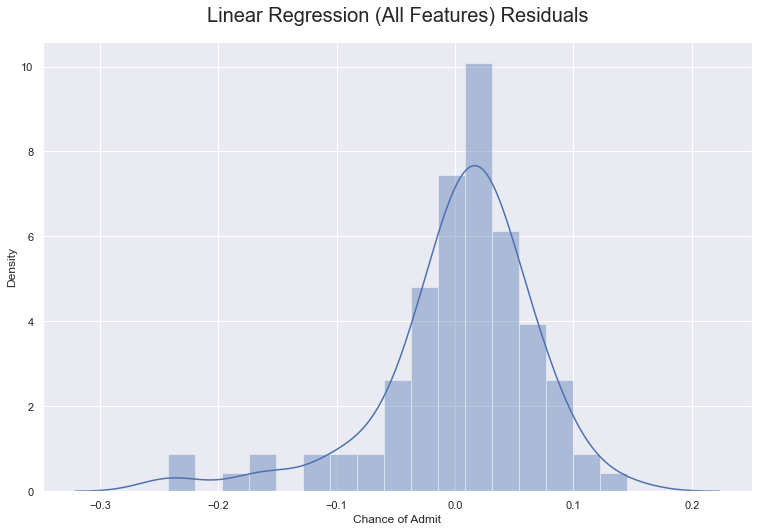

In [46]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



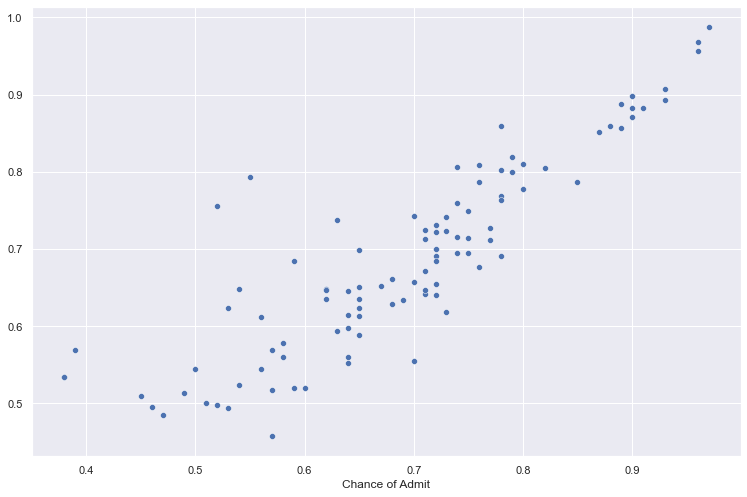

In [47]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, y_pred)
sns.scatterplot(y_test, y_pred)
plt.show()

In [48]:
X_selected = X[['CGPA', 'GRE Score', 'TOEFL Score']]
X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_selected, y, random_state=101)
lr_sel = LinearRegression()
lr_sel.fit(X_sel_train, y_train)
lr_sel_predictions = lr_sel.predict(X_sel_test)
lr_sel_r2 = r2_score(y_test, lr_sel_predictions)
lr_sel_mse = mean_squared_error(y_test, lr_sel_predictions)
lr_sel_rmse = np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7268517110749728 
Linear Regression MSE: 0.0047926489515469715, 
Linear Regression RMSE:0.06922896035292579


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
rfr.fit(X_train,y_train)
y_head_rfr = rfr.predict(X_test) 


In [50]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_head_rfr))

r_square score:  0.7052483078725816


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test) 


In [52]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.4154779789763571


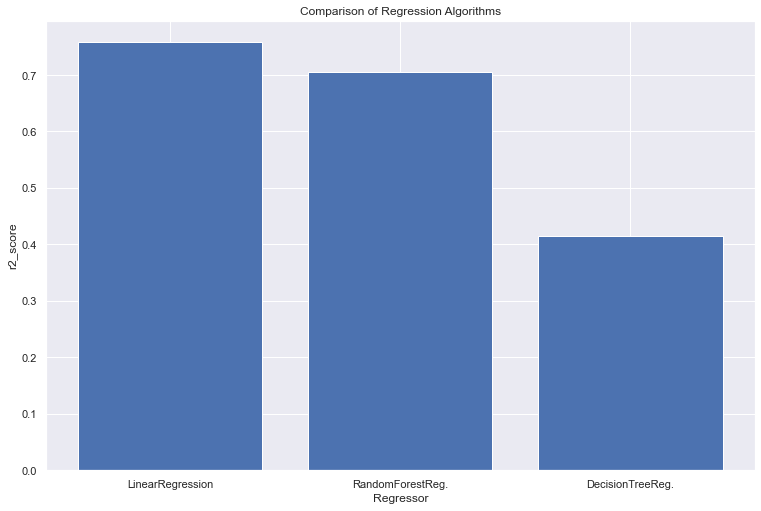

In [53]:
y = np.array([r2_score(y_test,y_pred),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

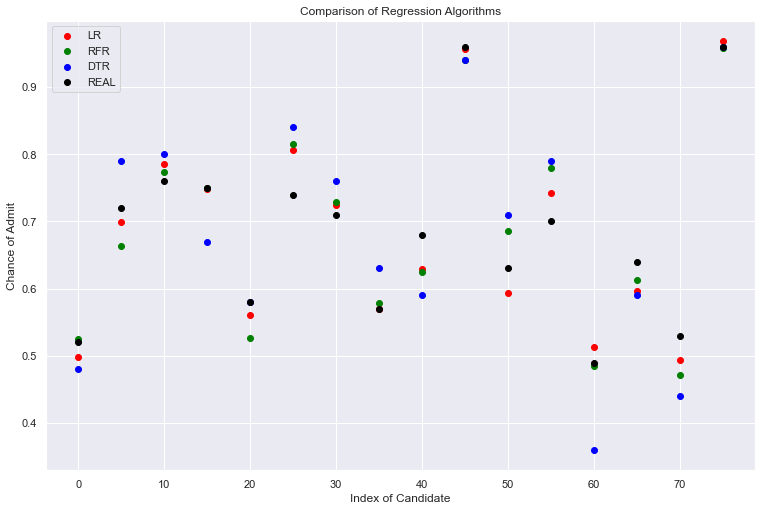

In [54]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_head_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

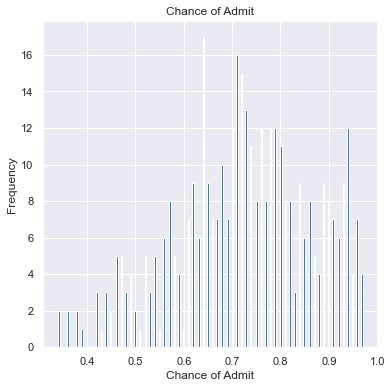

In [56]:
df["Chance of Admit"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.show()

# # Prediction Models : Classification Algorithms

In [58]:
df = pd.read_csv("Admission_Predict.csv")
df.shape

(400, 9)

In [59]:
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
X = df.drop(["Chance of Admit"],axis=1)
y = df["Chance of Admit"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

<ipython-input-59-88cbd116d807>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\prasa\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-59-88cbd116d807>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

LogisticRegression()

In [61]:
y_predlogr = logr.predict(X_test)

In [62]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.975


In [63]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[67  1]
 [ 1 11]]


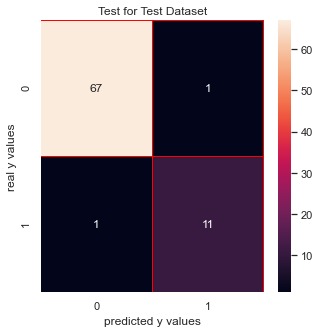

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [65]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


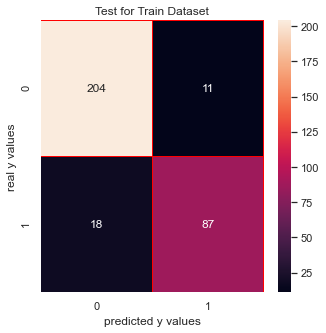

In [66]:
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

## Support Vector Machine

In [67]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train_01)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test_01))

score:  0.9375


In [68]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[65,  3],
       [ 2, 10]], dtype=int64)

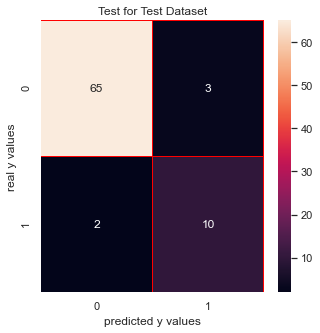

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [70]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


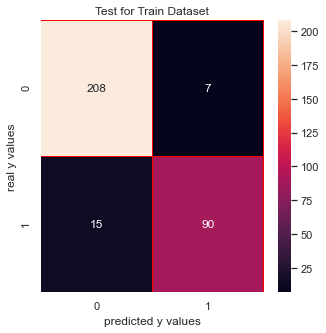

In [71]:
cm_svm_train = confusion_matrix(y_train_01, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

## 3. Gaussian Naive Bayes¶

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train_01)
y_pred_nb = nb.predict(X_test)
print("score: ", nb.score(X_test,y_test_01))

score:  0.9375


In [73]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01, y_pred_nb)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_nb

array([[63,  5],
       [ 0, 12]], dtype=int64)

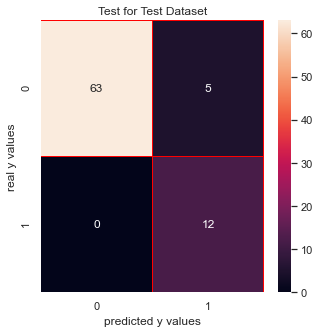

In [74]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [75]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_nb))
print("recall_score: ", recall_score(y_test_01,y_pred_nb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_nb))

precision_score:  0.7058823529411765
recall_score:  1.0
f1_score:  0.8275862068965517


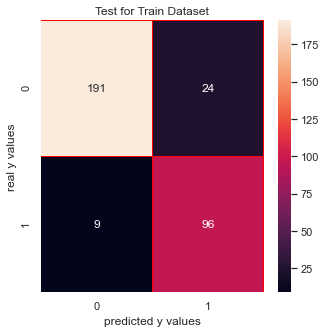

In [76]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

## 4. Decision Tree 

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.925


In [78]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc

array([[65,  3],
       [ 3,  9]], dtype=int64)

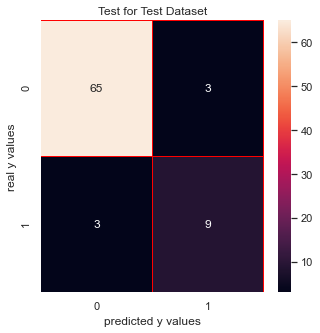

In [79]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [80]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_dtc))
print("recall_score: ", recall_score(y_test_01, y_pred_dtc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_dtc))

precision_score:  0.75
recall_score:  0.75
f1_score:  0.75


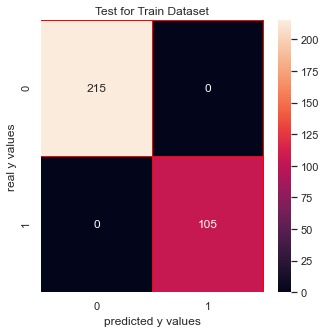

In [81]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

## 5. Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9375


In [83]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[65,  3],
       [ 2, 10]], dtype=int64)

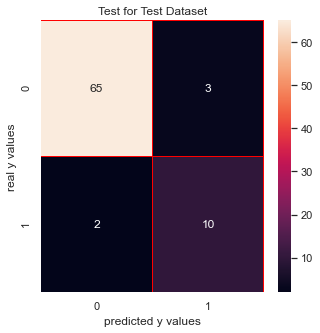

In [84]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [85]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_rfc))
print("recall_score: ", recall_score(y_test_01, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_rfc))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


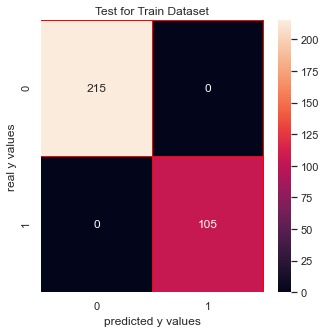

In [86]:
cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

##  6.K Nearest Neighbors

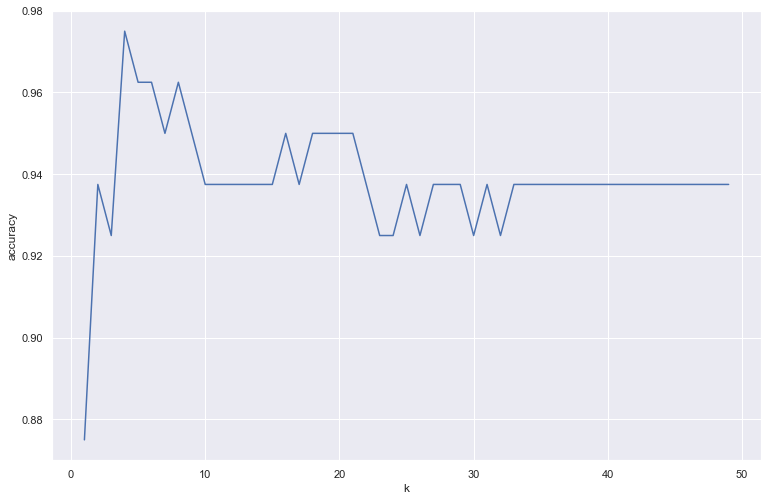

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train_01)
    scores.append(knn_n.score(X_test, y_test_01))
    
plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [88]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 3 :",knn.score(X_test,y_test_01))

score of 3 : 0.925


In [89]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01, y_pred_knn)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_knn

array([[63,  5],
       [ 1, 11]], dtype=int64)

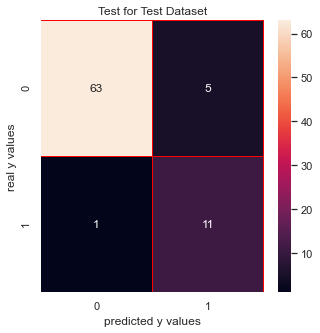

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [91]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_knn))
print("recall_score: ", recall_score(y_test_01, y_pred_knn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_knn))

precision_score:  0.6875
recall_score:  0.9166666666666666
f1_score:  0.7857142857142857


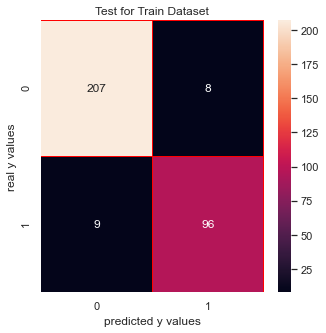

In [92]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

## Comparison of Classification Algorithms

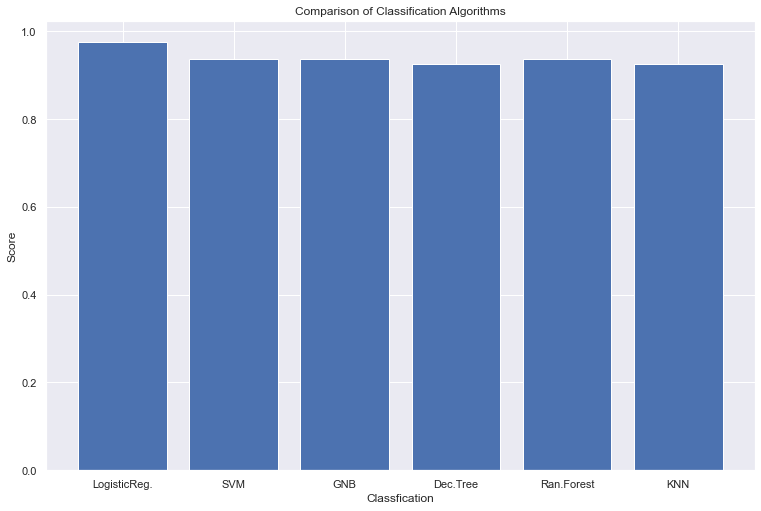

In [93]:
y = np.array([logr.score(X_test, y_test_01), svm.score(X_test, y_test_01), nb.score(X_test, y_test_01), dtc.score(X_test,y_test_01), rfc.score(X_test, y_test_01), knn.score(X_test, y_test_01)])
#x = ["LogisticRegression","SVM","GaussianNB","DecisionTreeClassifier","RandomForestClassifier","KNeighborsClassifier"]
x = ["LogisticReg.", "SVM", "GNB", "Dec.Tree", "Ran.Forest", "KNN"]

plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()